# Linear Regression on Used Cars Dataset

During this project, I will work on a large dataset of used car prices to try to apply a linear regression model that predicts a car's selling price.

I will be performing various tasks such as:
1. Data Cleaning & Preprocessing
2. Regplots & Boxplots to Identify Outliers
3. Removing Outliers
4. Applying a Linear Regression Model

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


### Data Cleaning & Preprocessing

First, I will remove all $ signs from the fields "sellingprice", "mmr", and "odometer" then convert them into int in order to be able to treat them as numbers.

In [48]:
#Removes all $ signs from the column "selling price" and converts it into an int
df['sellingprice'] = df['sellingprice'].str.replace('$', '', regex = True).astype(int)

In [49]:
#Removes all "mi" from column "odometer" then converts it into float then into int
df['odometer'] = df['odometer'].str.replace('mi', '', regex = True).astype(float).astype(int)

In [50]:
#Removes all $ signs from the column "mmr" and converts it into int
df['mmr'] = df['mmr'].str.replace('$', '', regex = True).astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text major ticklabel objects>)

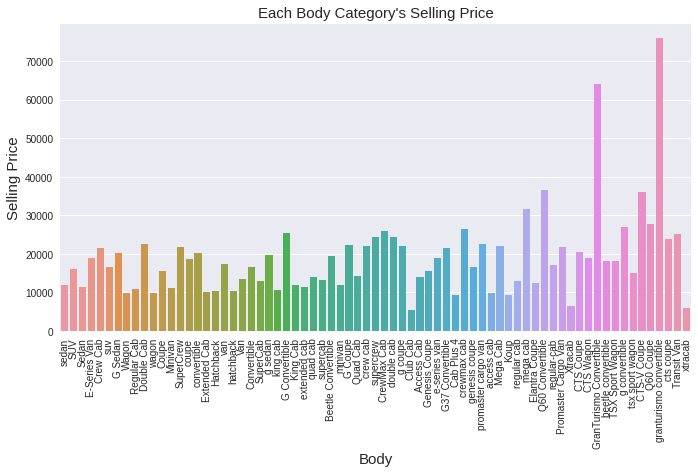

In [51]:
sns.catplot(data=df, x='body', y='sellingprice', ci = None, kind = "bar", aspect = 2)
plt.xlabel('Body', size = 15)
plt.title("Each Body Category's Selling Price", size = 15)
plt.ylabel('Selling Price', size = 15)
plt.xticks(rotation = 90)

**Conclusion:** The catplot shows that the dataset has many different body types that are in fact irrelevant, inconsistent, and completely wrong. Therefore, I will reduce the body types to have only eight different categories.

In [52]:
#Turns any phrases that contain the words "van" or "Van" to "Van", example: "E-Series Van" --> "Van"
df['body'] = np.where(df.body.str.contains("Van"), "Minivan", df['body'])
df['body'] = np.where(df.body.str.contains("van"), "Minivan", df['body'])

In [53]:
#Turns any phrases that contain the words "sedan" or "Sedan" to "Sedan", example: "G Sedan" --> "Sedan"
df['body'] = np.where(df.body.str.contains('Sedan'), "Sedan", df['body'])
df['body'] = np.where(df.body.str.contains('sedan'), "Sedan", df['body'])

In [54]:
#Turns any phrases that contain "Cab" or "cab" or "Supercrew" or "supercrew" to "Pickup Truck"
df['body'] = np.where(df.body.str.contains('Cab'), "Pickup Truck", df['body'])
df['body'] = np.where(df.body.str.contains('cab'), "Pickup Truck", df['body'])
df['body'] = np.where(df.body.str.contains('SuperCrew'), "Pickup Truck", df['body'])
df['body'] = np.where(df.body.str.contains('supercrew'), "Pickup Truck", df['body'])

In [55]:
#Turns any phrases that contain "suv" or "Suv" to "SUV"
df['body'] = np.where(df.body.str.contains('suv'), "SUV", df['body'])
df['body'] = np.where(df.body.str.contains('Suv'), "SUV", df['body'])

In [56]:
#Turns any phrases that contain "wagon" or "Wagon" to "Wagon"
df['body'] = np.where(df.body.str.contains('wagon'), "Wagon", df['body'])
df['body'] = np.where(df.body.str.contains('Wagon'), "Wagon", df['body'])

In [57]:
#Turns any phrases that contain "coupe", "Coupe", or "Koup" to "Coupe"
df['body'] = np.where(df.body.str.contains('coupe'), "Coupe", df['body'])
df['body'] = np.where(df.body.str.contains('Coupe'), "Coupe", df['body'])
df['body'] = np.where(df.body.str.contains('Koup'), "Coupe", df['body'])

In [58]:
#Turns any phrases that contain "convertible" or "Convertible" to "Convertible"
df['body'] = np.where(df.body.str.contains('convertible'), "Convertible", df['body'])
df['body'] = np.where(df.body.str.contains('Convertible'), "Convertible", df['body'])

In [59]:
#Turns any phrases that contain "hatchback" or "Hatchback" to "Hatchback"
df['body'] = np.where(df.body.str.contains('hatchback'), "Hatchback", df['body'])
df['body'] = np.where(df.body.str.contains('Hatchback'), "Hatchback", df['body'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

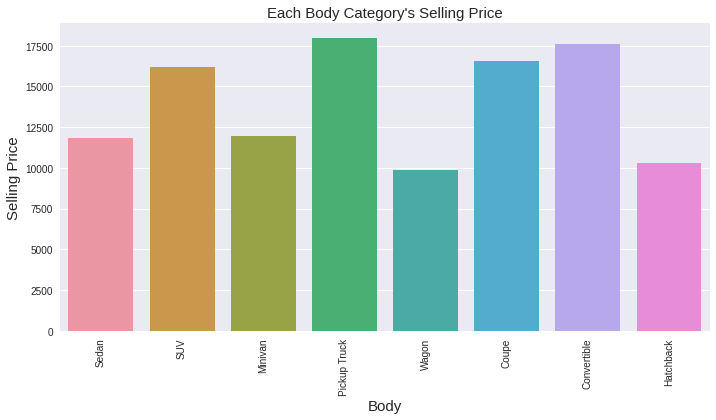

In [60]:
sns.catplot(data=df, x='body', y='sellingprice', ci = None, kind = "bar", aspect = 2)
plt.xlabel('Body', size = 15)
plt.title("Each Body Category's Selling Price", size = 15)
plt.ylabel('Selling Price', size = 15)
plt.xticks(rotation = 90)

**As seen, now the catplot shows only eight body categories.**

In [61]:
#Makes all letters in column "state" capitalized
df['state'] = df['state'].str.upper()

In [62]:
#Makes letters in 'vin' uppercase
df['vin'] = df['vin'].str.upper()

In [63]:
#Changes all "—" cells to "unknown"
df['color'] = np.where(df.color.str.contains('—'), "Unknown", df['color'])
df['interior'] = np.where(df.interior.str.contains('—'), "Unknown", df['interior'])

In [64]:
#Makes the first letters of 'manual' and 'automatic' capitalized
df['transmission'] = np.where(df.transmission.str.contains('automatic'), "Automatic", df['transmission'])
df['transmission'] = np.where(df.transmission.str.contains('manual'), "Manual", df['transmission'])

In [65]:
#Checks if the dataframe has any duplicate rows (to be deleted if any where found)
print("There are " + str(df.duplicated().sum()) + " duplicated rows")

There are 0 duplicated rows


In [66]:
#Making sure changes are implemented
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5NPEB4ACXDH702805,MA,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,Automatic,JTEZU5JR2E5064567,FL,4.9,17846,gray,Unknown,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,JTHBF5C24C5168599,FL,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,Automatic,5UXFB33562LH33864,FL,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,Automatic,1FTNE2EW0EDA31832,WA,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


# Regplot

Text(0, 0.5, 'Selling Price')

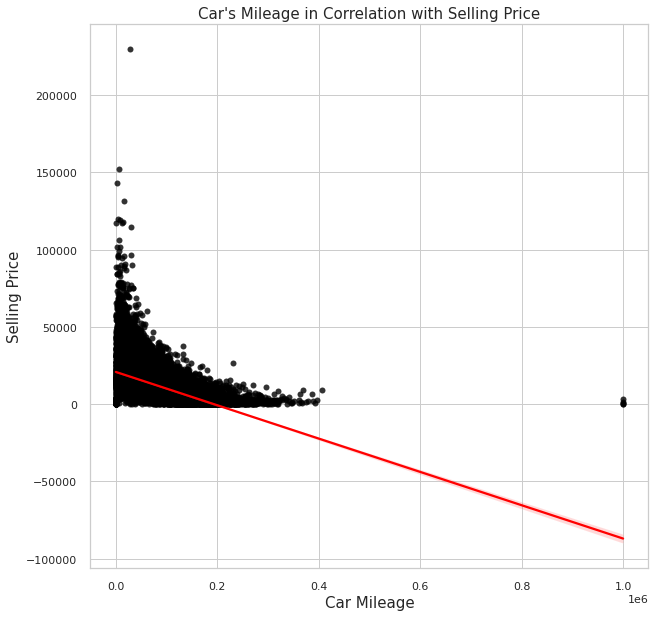

In [67]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid")
sns.regplot(data=df, x='odometer', y ='sellingprice', fit_reg = True, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Car's Mileage in Correlation with Selling Price", size = 15)
plt.xlabel('Car Mileage', size = 15)
plt.ylabel('Selling Price', size = 15)

**Using the replot, we can clearly see that there exists an outlier than makes the line of best fit extend negatively. Therefore, clearly this will reduce the accuracy of the linear regression model.**

### Handling Outliers

In [68]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)

    # Dropping the inplace values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

drop_numerical_outliers(df)

Text(0, 0.5, 'Selling Price')

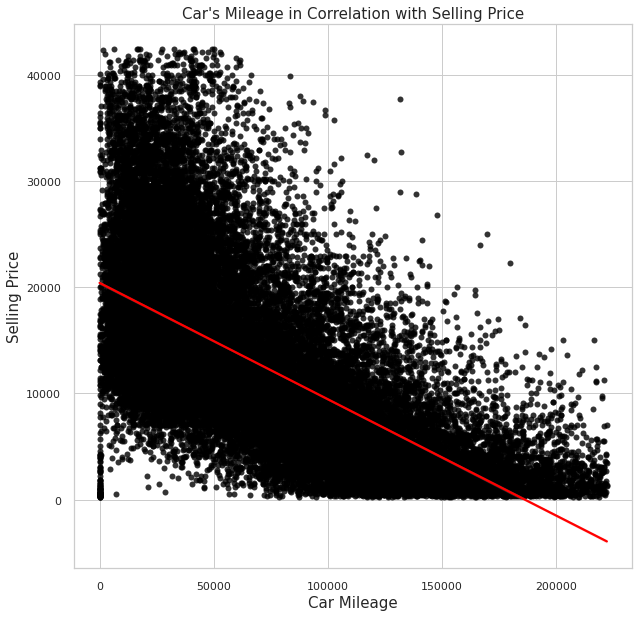

In [ ]:
#To check that the outliers are removed using a regression model

sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid")
sns.regplot(data=df, x='odometer', y ='sellingprice', fit_reg = True, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Car's Mileage in Correlation with Selling Price", size = 15)
plt.xlabel('Car Mileage', size = 15)
plt.ylabel('Selling Price', size = 15)

**As seen, the regression model now shows that the outliers are removed as it does not extend to the negative side.**

### Modelling

In [ ]:
#Dropping columns that do not have an effect on the car's price
df = df.drop('vin' , axis = 'columns')
df = df.drop('seller' , axis = 'columns')
df = df.drop('saledate' , axis = 'columns')
df = df.drop('state' , axis = 'columns')
df = df.drop('trim' , axis = 'columns')
df = df.drop('body' , axis = 'columns')

In [ ]:
#As the MMr will greatly help the model in predicting the price, we drop it as well.
df = df.drop('mmr' , axis = 'columns')

In [ ]:
#Columns that have an effect on the car's price
categorical_columns = ['make', 'model', 'transmission', 'color', 'interior']
df_encode = pd.get_dummies(data = df, columns = categorical_columns, drop_first = True, dtype = 'int8')
df_encode.head()

,year,condition,odometer,sellingprice,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,...,interior_gold,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white
0,2013,3.9,50404,10900,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2014,4.9,17846,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303,3200,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714,22100,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
numerical_columns = ['year', 'condition', 'odometer']

df_encode[numerical_columns] = (df_encode[numerical_columns] - df_encode[numerical_columns].min())/(df_encode[numerical_columns].max() - df_encode[numerical_columns].min())


df_encode.head()

,year,condition,odometer,sellingprice,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,...,interior_gold,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white
0,0.8750,0.725,0.226581,10900,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.9375,0.975,0.080220,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.8125,0.775,0.094947,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.1875,0.225,0.653189,3200,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.9375,0.975,0.030178,22100,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice', axis = 1)
y = df_encode['sellingprice']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 36129
Testing dataset size: 9033


In [ ]:
#Checking percentage of training and testing dataset sizes
#Training dataset should be 80% of total
#Testing dataset should be 20% of total

import math
total_size = x_train.shape[0] + x_test.shape[0]
if(x_train.shape[0] == math.floor(0.8*total_size) and x_test.shape[0] == math.ceil(0.2*total_size)):
  print ('Is the training dataset 80% of the total?:', True)
  print ('Is the training dataset 20% of the total?:', True)
else:
  print ('Is the training dataset 80% of the total?:', False)
  print ('Is the training dataset 20% of the total?:', False)

Is the training dataset 80% of the total?: True
Is the training dataset 20% of the total?: True


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train , y_train);

parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,5174.205601
1,theta_1,year,15714.488128
2,theta_2,condition,5369.797069
3,theta_3,odometer,-11236.495157
4,theta_4,make_Audi,5779.949184
...,...,...,...
674,theta_674,interior_purple,504.000369
675,theta_675,interior_red,2406.144115
676,theta_676,interior_silver,-800.255208
677,theta_677,interior_tan,-243.507164


In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square1 = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is:', rmse)
print('R^2 obtained is:', R_square1)

The root mean square error (RMSE) is: 3177.7274582601963
R^2 obtained is: 0.8461024127653266


In [ ]:
#Accuracy of Model
print('Accuracy of model:', round(R_square1*100, 2), '%')

Accuracy of model: 84.61 %


The linear regression model's score is 0.8461 or 84.61%. Which is considered a good value when it comes to the used car market's domain context and use-case. In general, the R-squared value of 0.8461 implies more precision for predictor variables. That said, 0.8461 is an acceptable baseline to achieve without any data transformation or outlier handling. An 84.61% accuracy or 0.8461 R Squared value is in fact considered a very good accuracy score. 

The root mean squared is 3,177 dollars. This tells us that the average deviation between the predicted selling price and the actual selling price is 3,177 dollars.

Overall, yes I would definitely recommend used car dealerships that want to get reliable estimate for used car prices to use this model.